<a href="https://colab.research.google.com/github/ChairaWandau/3DML_OpenCV_HomeWorks/blob/main/OpenCV/OpenCV_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1: В папке находится изображение railway.jpeg с железной дорогой, уходящей вдаль от камеры. Необходимо, используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами.

Пример результата с подсказкой содержит изображение railway_result.png.

Подсказка 2: чтобы было легче определять координаты ключевых точек изображения, отобразите его с помощью plt.imshow(img) (!не в ноутбуке) - в правом нижнем углу открытого окна будут отображаться координаты пикселей, на которые Вы наводите мышкой.

Задание 2: В папке находится изображение palm.png с пальмой. Используя классические аффинные преобразования, необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке. Пример результата находится в изображении palm_result.png

In [1]:
import sys

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# Для удобочитаемого вывода матриц
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

In [3]:
# Клонируем репозиторий с картинками
!git clone https://github.com/ChairaWandau/3DML_OpenCV_HomeWorks.git

Cloning into '3DML_OpenCV_HomeWorks'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 10), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (53/53), 9.31 MiB | 23.83 MiB/s, done.
Resolving deltas: 100% (10/10), done.


Задание 1: В папке находится изображение railway.jpeg с железной дорогой, уходящей вдаль от камеры. Необходимо, используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами.

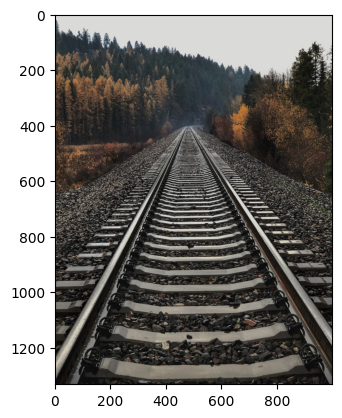

In [21]:
image_railway = cv.cvtColor(cv.imread("/content/3DML_OpenCV_HomeWorks/OpenCV/railway.jpeg"), cv.COLOR_BGR2RGB)
plt.imshow(image_railway)

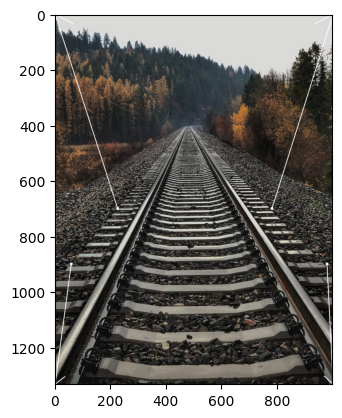

In [28]:
image_railway_copy = image_railway.copy()
pts1 = [
    [225, 700],
    [780, 700],
    [58, 900],
    [978, 900]
]
pts2 = [
    [0, 0],
    [image_railway_copy.shape[1], 0],
    [0, image_railway_copy.shape[0]],
    [image_railway_copy.shape[1], image_railway_copy.shape[0]]
]

WHITE = (255, 255, 255)
for p1, p2 in zip(pts1, pts2):
    cv.circle(image_railway_copy, center=p1, radius=5, color=WHITE, thickness=-1)
    cv.circle(image_railway_copy, center=p2, radius=5, color=WHITE, thickness=-1)
    cv.arrowedLine(image_railway_copy, p1, p2, color=WHITE, thickness=2)

plt.imshow(image_railway_copy)

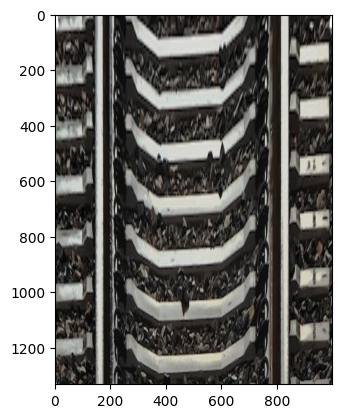

In [31]:
height, width = image_railway.shape[:2]
M = cv.getPerspectiveTransform(np.float32(pts1), np.float32(pts2))
image_railway_Perspective = cv.warpPerspective(image_railway_copy, M, (width, height))
plt.imshow(image_railway_Perspective)

Задание 2: В папке находится изображение palm.png с пальмой. Используя классические аффинные преобразования, необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке. Пример результата находится в изображении palm_result.png

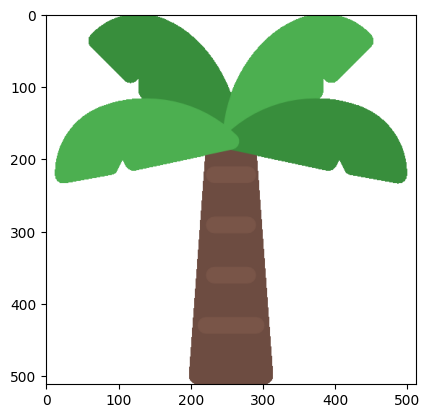

In [41]:
image_palm = cv.cvtColor(cv.imread("/content/3DML_OpenCV_HomeWorks/OpenCV/palm.png"), cv.COLOR_BGR2RGB)
plt.imshow(image_palm)

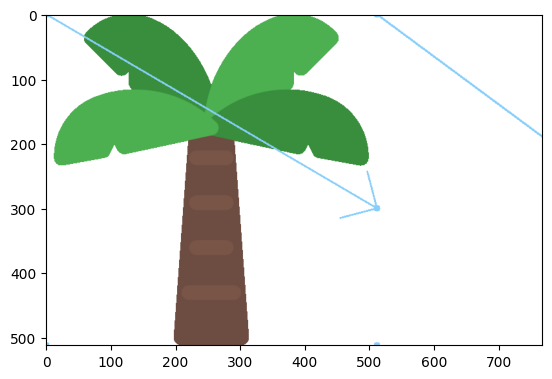

In [142]:
height, width = image_palm.shape[:2]
image_palm_copy = np.zeros((height, int(width * 1.5), 3), np.uint8)
image_palm_copy.fill(255)
image_palm_copy[0:height, 0:width, :] = image_palm
pts1 = [
    [0, 0],
    [width, 0],
    [0, height],
    [width, height],
]
pts2 = [
    [width, 300],
    [image_palm_copy.shape[1]+150, 300],
    [0, height],
    [width, height],
]
blue = (135,206,250)
for p1, p2 in zip(pts1, pts2):
    cv.circle(image_palm_copy, center=p1, radius=5, color=blue, thickness=-1)
    cv.circle(image_palm_copy, center=p2, radius=5, color=blue, thickness=-1)
    cv.arrowedLine(image_palm_copy, p1, p2, color=blue, thickness=2)
plt.imshow(image_palm_copy)

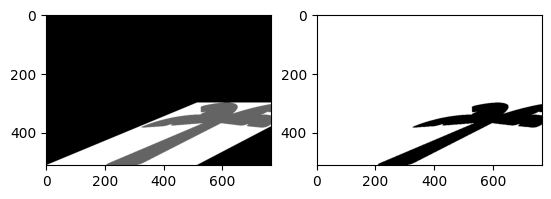

In [141]:
M = cv.getPerspectiveTransform(np.float32(pts1), np.float32(pts2))
image_palm_shadow = image_palm.copy()
image_palm_shadow[image_palm_shadow != 255] = 100
image_palm_Perspective = cv.warpPerspective(image_palm_shadow, M, (image_palm_copy.shape[1], image_palm_copy.shape[0]))
image_palm_Perspective_shadow = image_palm_Perspective.copy()
# все черные пиксели делаем белыми
image_palm_Perspective_shadow[image_palm_Perspective_shadow == 0] = 255
# все не серые пиксели делаем белыми
image_palm_Perspective_shadow[image_palm_Perspective_shadow != 100] = 255
# все серые пиксели делаем черными
image_palm_Perspective_shadow[image_palm_Perspective_shadow == 100] = 0
plt.subplot(1, 2, 1)
plt.imshow(image_palm_Perspective)
plt.subplot(1, 2, 2)
plt.imshow(image_palm_Perspective_shadow)

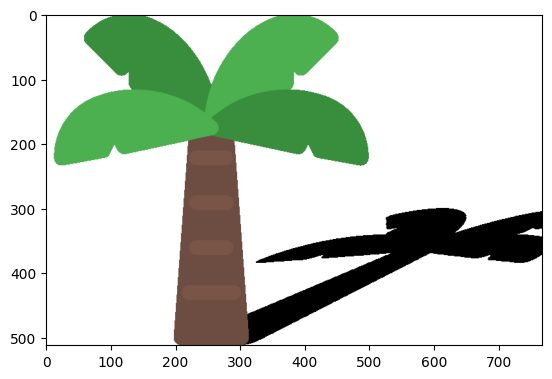

In [134]:
# объединяем изображения
image_palm_with_shadow = image_palm_Perspective_shadow.copy()
for x in range(image_palm.shape[0]):
    for y in range(image_palm.shape[1]):
        if (image_palm[x,y] != 255).all():
            image_palm_with_shadow[x,y] = image_palm[x,y]
plt.imshow(image_palm_with_shadow)